In [ ]:
import numpy as np

a = np.array([1,2,3,4])
print(a)

In [ ]:
import time

a = np.random.rand(100000)
b = np.random.rand(100000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print("Vectorized version:"+ str(1000*(toc-tic))+"ms")

In [ ]:
# 用窗口大小不同（5，7，9）的核函数来做中值滤波
import cv2
import numpy as np

img1 = cv2.imread('"D:\\HSY-data\\Mask\\MaskDefect\\film_new\\film035.jpg"')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2-e1)/cv2.getTickFrequency()
print (t)

In [ ]:
# OpenCV blur归一化滤波、GaussianBlur高斯滤波、medianBlur中值滤波
import cv2

img = cv2.imread("D:\\HSY-data\\Mask\\MaskDefect\\film_new\\film035.jpg")
cv2.imshow('org',img)
kernelsizes = [(3,3),(9,9),(15,15)]

for kernel in kernelsizes:
    blur = cv2.blur(img,kernel)
    cv2.imshow('Average:'+str(kernel),blur)

for kernel in kernelsizes:
    gaussian = cv2.GaussianBlur(img,kernel,0)
    cv2.imshow('GaussianBlur:'+str(kernel),gaussian)

for kernel in (3,9,15):
    median = cv2.medianBlur(img,kernel)
    cv2.imshow('MedianBlur:'+str(kernel),median)

params = [(90,50,10),(50,90,10),(10,90,50)]
for p1,p2,p3 in params:
    bilateral = cv2.bilateralFilter(img,p1,p2,p3)
    cv2.imshow('bilateral'+str((p1,p2,p3)),bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2 
img = cv2.imread("D:\\HSY-data\\test.jpg")
result = cv2.blur(img,(10,10))
cv2.imshow("img",img)
cv2.imshow("result",result)
cv2.waitKey()
cv2.destoryAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\box_filter.dispatch.cpp:446: error: (-215:Assertion failed) !_src.empty() in function 'cv::boxFilter'


In [2]:
import cv2 as cv
import numpy as np 
import random

def rgb2gray(img):
    imageInfo=img.shape
    h=imageInfo[0]
    w=imageInfo[1]
    img1=np.zeros((h,w),np.uint8)
    for i in range(h):
        for j in range(w):
            img1[i,j]=0.144*img[i,j,0]+0.587*img[i,j,1]+0.299*img[i,j,2]
    return img1

def noise(img,snr):
    imageInfo=img.shape
    h=imageInfo[0]
    w=imageInfo[1]
    img1=img.copy()
    sp=h*w # 计算五项像素点个数
    NP=int(sp*(1-snr)) # 计算图像椒盐噪声点个数
    for i in range(NP):
        randx=np.random.randint(1,h-1) # 生成一个1至h-1之间的随机整数
        randy=np.random.randint(1,w-1) # 生成一个1至w-1之间的随机整数
        if np.random.random()<=0.5:
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    return img1

image = cv.imread("D:\\HSY-data\\Mask\\MaskDefect\\film_new\\film035.jpg")
grayimage=rgb2gray(image)
noiseimage=noise(grayimage,0.8)
result1 = cv.medianBlur(noiseimage,3)
result2 = cv.medianBlur(noiseimage,7)
cv.imshow("grayimge",grayimage)
cv.imshow("noiseimage",noiseimage)
cv.imshow("result1",result1)
cv.imshow("result2",result2)
cv.waitKey(0)
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

<IPython.core.display.Javascript object>


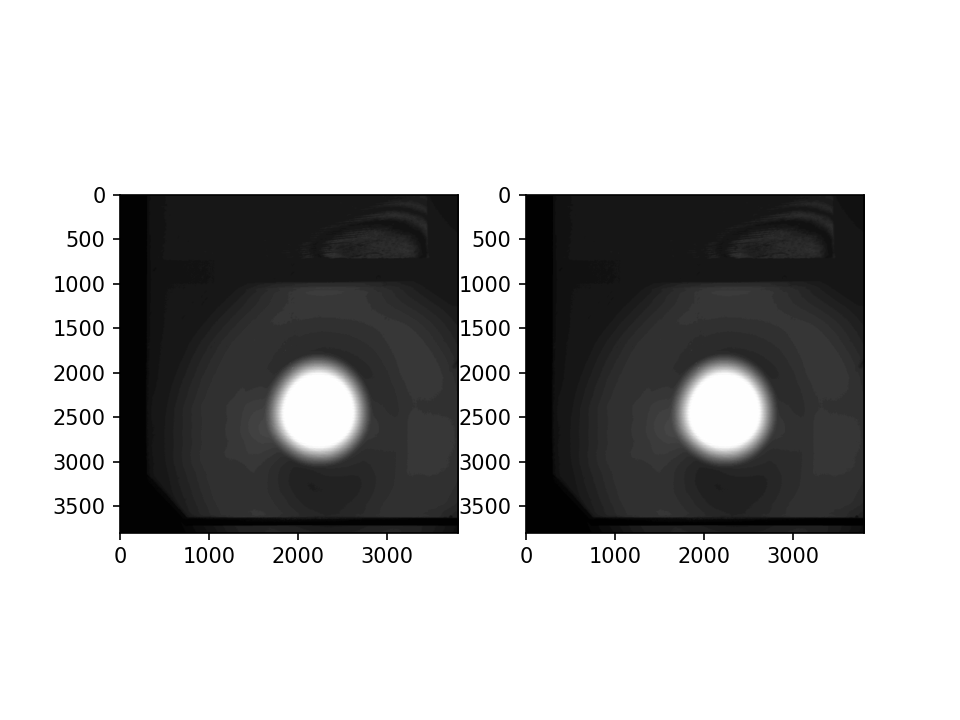

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cdc3a83550>)

In [3]:
# 全局阈值
%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)
img1=np.float32(img)
kernel=np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img1,-1,kernel)
plt.subplot(1,2,1),plt.imshow(img1,'gray')
plt.subplot(1,2,2),plt.imshow(dst,'gray')

<IPython.core.display.Javascript object>


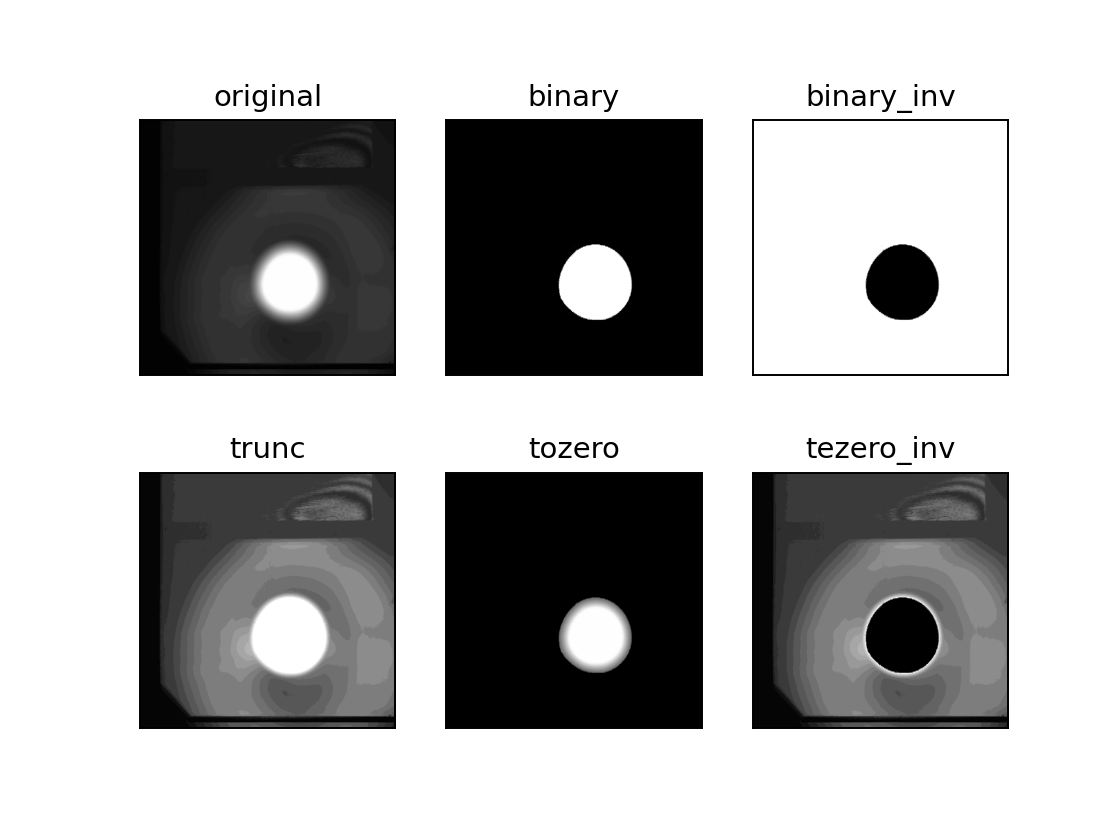

In [3]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt

img_org = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg")
img = cv2.cvtColor(img_org,cv2.COLOR_BGR2GRAY)
img_org = img_org[:,:,::-1]
"""
threshhold(图片，阈值，最大值，类型)
五个常用的阈值操作
THRESH_BINARY 超过阈值的部分取最大值，否则就是0
THRESH)BINARY_INV 这个就是把THRESH_BINARY 的结果反过来
THRESH_TRUNC 大于阈值的部分设为阈值，否则不变
THRESH_TOZERO 大于阈值部分不变，否则设为0
THRESH_TOZERO_INV 就是上边的TOZERO的反转
"""
ret,thresh1=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)

titles = ['original','binary','binary_inv','trunc','tozero','tezero_inv']
images = [img_org,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') # 在一个窗口显示多个图像
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


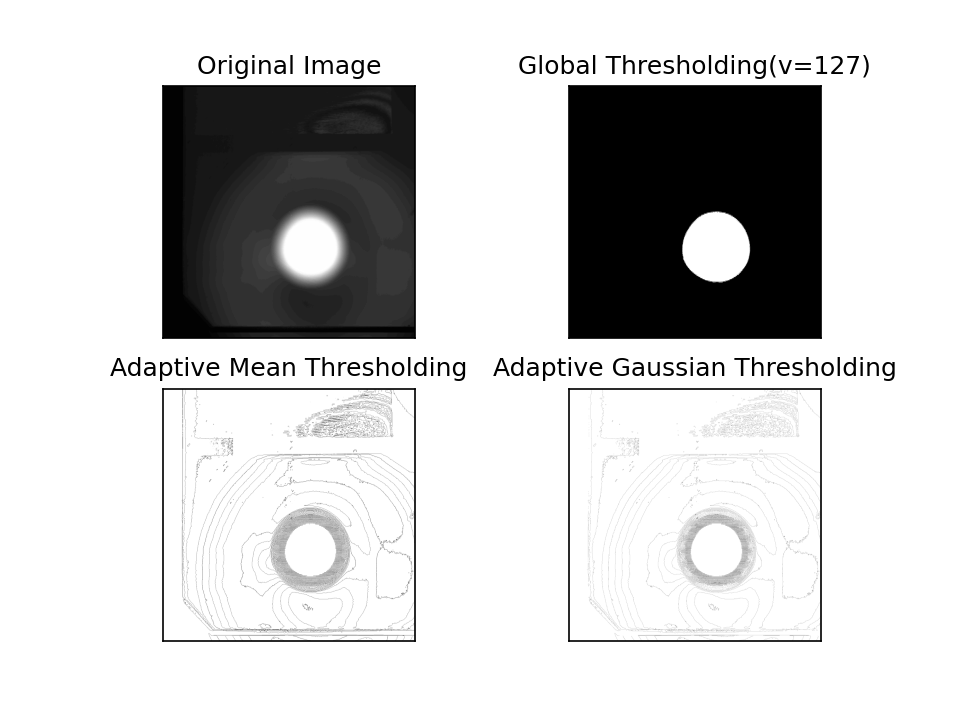

In [4]:
# 自适应阈值
%matplotlib notebook
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)
#中值滤波
img = cv2.medianBlur(img,5)


re,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#11 为block size,2w为c值
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles=['Original Image','Global Thresholding(v=127)','Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']
images=[img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


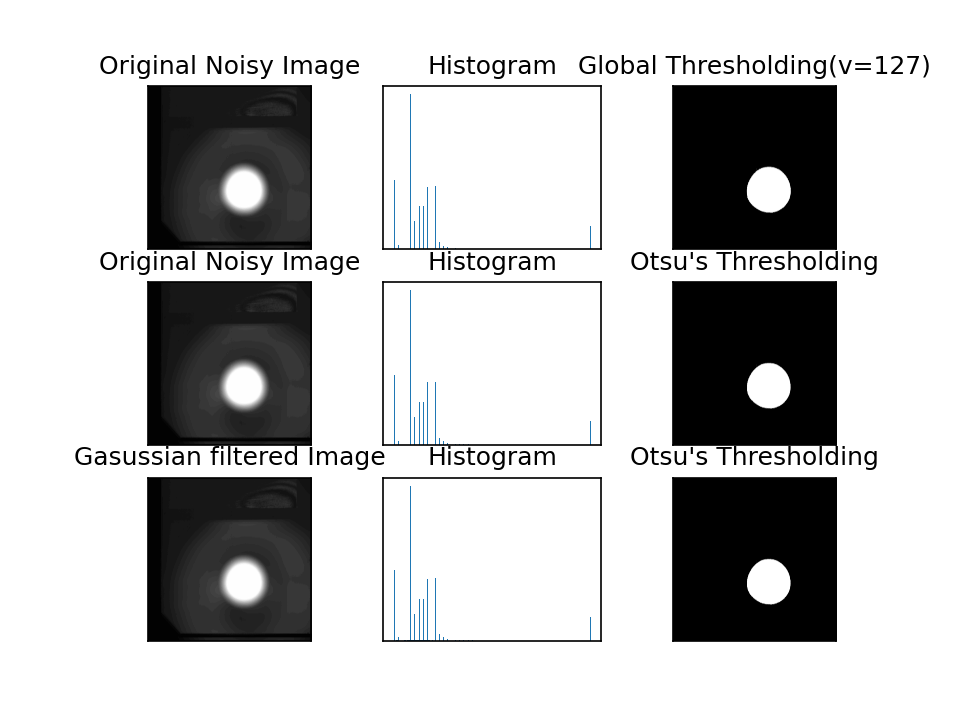

In [5]:
# Otsu's 二值化
%matplotlib notebook
import cv2
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)

#globle thresholding 
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#Otsu's thresholding 
ret1,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding ater Gaussian filtering 
#(5,5)为高斯核的大小，0为标准差
blur = cv2.GaussianBlur(img,(5,5),0)
# 阈值一定要设为0
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#plot all the image and their histograms
images = [img,0,th1,img,0,th2,blur,0,th3]
titles=['Original Noisy Image','Histogram','Global Thresholding(v=127)','Original Noisy Image','Histogram',"Otsu's Thresholding",'Gasussian filtered Image','Histogram',"Otsu's Thresholding"]

# 这里使用了pyplot中画直方图的方法，plt.hist,要注意的是它的参数是一维数组
# 所以这里使用了(numpy)ravel 方法，将多维数组转换成一维，也可以使用flatten方法
# ndarray.flat 1-D iterator over an array.
# ndarray.flatten 1-D array copy of the elements of an array in row-major order.
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
#腐蚀 膨胀 开运算（先腐蚀再膨胀,去除噪声）
# 闭运算 先膨胀再腐蚀，填充前景物体上的小洞
%matplotlib notebook
import cv2
import numpy as np
import matplotlib as plt

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations =1)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,3,2),plt.imshow(erosion,cmap ='gray')
plt.title('erosion'),plt.xticks([]),plt.yticks([])
plt.subplot(2,3,3),plt.imshow(dilation,cmap = 'gray')
plt.title('dilation'),plt.xticks([]),plt.yticks([])
plt.subplot(2,3,4),plt.imshow(opening,cmap = 'gray')
plt.title('opening'),plt.xticks([]),plt.yticks([])
plt.subplot(2,3,5),plt.imshow(closing,cmap = 'gray')
plt.title('closing'),plt.xticks([]),plt.yticks([])

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplot'

<IPython.core.display.Javascript object>


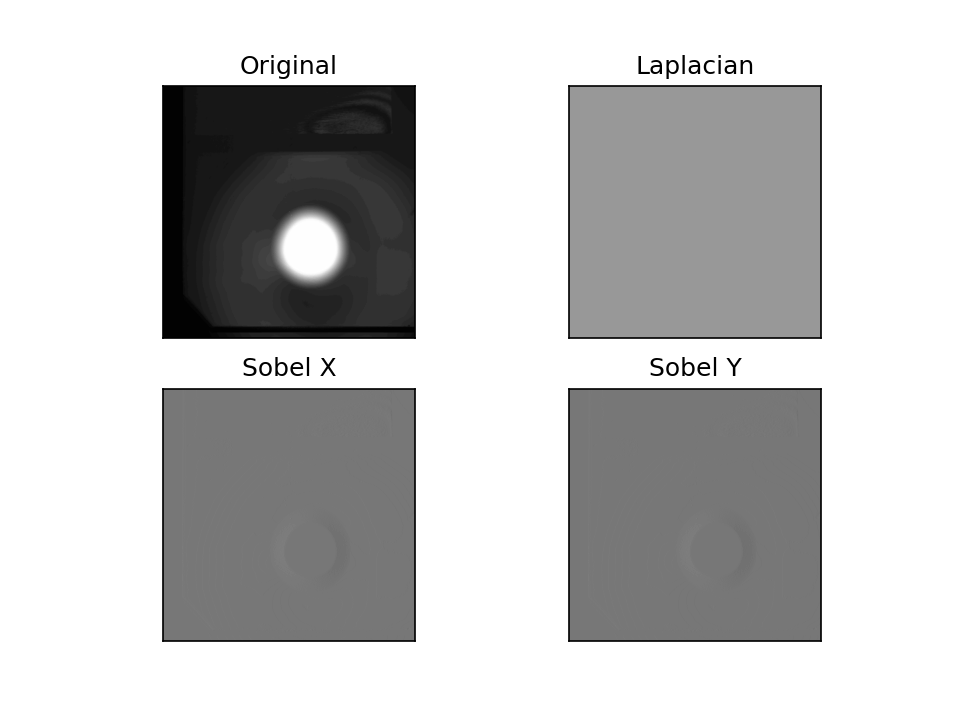

In [7]:
%matplotlib notebook
import cv2
import numpy as np 
from matplotlib import pyplot as plt

img=cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)

#cv2.CV_64F输出图像的深度（数据类型），可以使用-1，与原图像保持一致np.uint8
laplacian=cv2.Laplacian(img,cv2.CV_64F)
#参数1，0为只在x方向求一阶导数，最大可以求2阶导数
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#参数1，0为只在y方向求一阶导数，最大可以求2阶导数
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap ='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


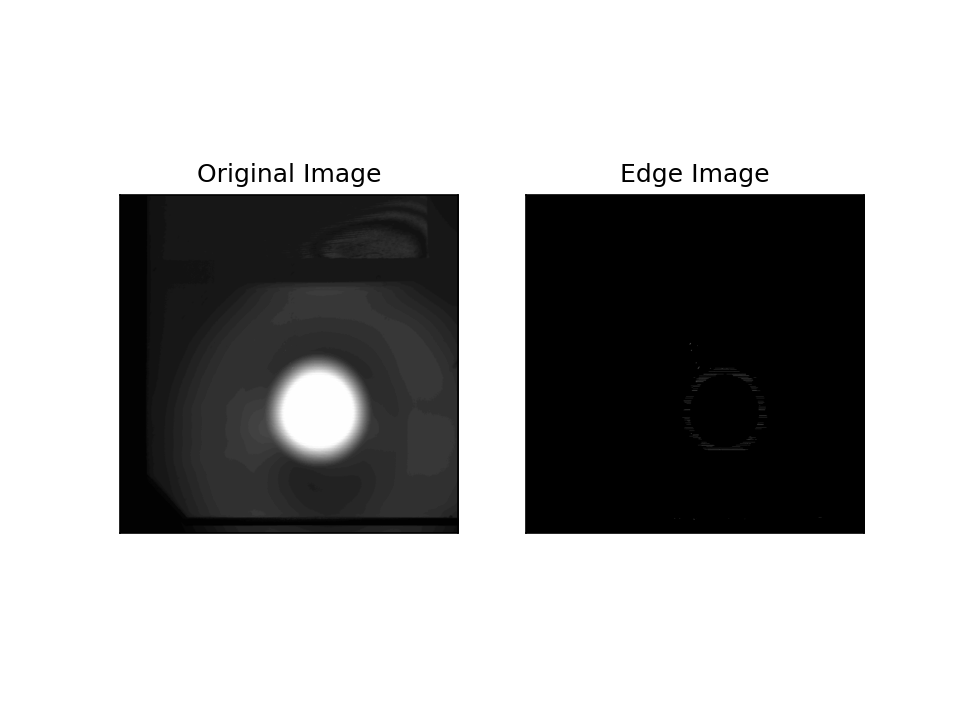

In [8]:
# 边缘检测
%matplotlib notebook
import cv2 
import numpy as np
from matplotlib import pyplot as plt 

img=cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)
edges =cv2.Canny(img,60,110)

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'),plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
# 图像拼接
import cv2
import numpy as np,sys

A = cv2.imread('E:\\picture\\left.jpg')
B = cv2.imread('E:\\picture\\right.jpg')

#generate Gaussian pyramid for A 
G = A.copy()
gpA=[G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Laplacian pyramid for A 
lpA=[gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

#generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range (5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.substract(gpB[i-1],GE)
    lpB.append(L)

#Now ad left and right halves of images in each level
#numpy.hstack(tup)
#Take a sequence of arrays and stack them horiziontally
#to make a single array
LS = []
for la,lb in zip(lpA,lpB):
    rows ,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols/2],lb[:,clos/2:])) #两个图像的矩阵的左半部分和右半部分拼接到一起
    LS.append(ls)

# now reconstruct
ls_ = LS[0] #高斯金字塔的最小图片
for i in range(1,6): #第一次循环的图像为高斯金字塔的最小图片，依次通过拉普拉斯变换恢复到最大图像
    ls_=cv2.pyrUp(ls_)
    ls_=cv2.add(ls_,LS[i]) #采用金字塔拼接方法的图像

#image with direct connecting each half
real = np.hstack((A[:,:cols/2],B[:,cols/2:])) #直接的拼接

cv2.imwrite('Pyramind_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

In [ ]:
#多对象的模板匹配
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('E:\\picture\\cs2.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
template = cv2.imread('E:\\picture\\coin.png',0)
w,h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

# umpy.where(condition[,x,y])
#Return elements ,either from x or y ,depengding on condition
#If only condition is given,return condition,nonzero()
loc = np.where(res>=threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb,pt,(pt[0]+w,pt[1]+h),(0,0,255),2)

cv2.imwrite('res2.png',img_rgb)

In [11]:
#霍夫变换直线检测
import cv2
import numpy as np 

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,10,150)
minLineLength = 1000
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,200,minLineLength,maxLineGap)
line1 = lines[:,0,:]
for x1,y1,x2,y2 in line1[:]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
cv2.imshow("edges",edges)
cv2.namedWindow('lines',0)
cv2.imshow("lines",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 轮廓检索
import cv2 as cv
#1 读取图片
def read_rgb_img(img_name):
    rgb_img=cv.imread(img_name,cv.IMREAD_COLOR)
    cv.imshow("rgb img",rgb_img)
    return rgb_img

#2 将图片转成一张灰色图片
def convert_rgb2gray(img):
    gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    return gray_img

#3 对图片进行二值化处理
def convert_gray2binary(img):
    _, binary_img = cv.threshold(img,0,255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
    return binary_img

#4 使用 findContours查找轮廓
def getContours(img):
    _, contours,hierarchy = cv.findContours(img,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    print(contours,hierarchy)
    return contours

#5 对轮廓进行处理
def draw_contours(img,contours):
    index = -1
    thickness =2
    color = (255,125,125)
    imgg = cv.drawContours(img,contours,index,color,thickness)
    cv.namedWindow('draw contours',0)
    cv.imshow('draw contours',imgg)
    for i,c in enumerate(contours):
        circle = cv.minEnclosingCircle(c)
        ((x,y),radius)=circle
        cv.circle(imgg,(int(x),int(y)),int(radius),(0,0,255),2)
        
if __name__ == '__main__':
    img_name = "E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg"
    rgb_img = read_rgb_img(img_name)
    gray_img = convert_rgb2gray(rgb_img)
    binary_image=convert_gray2binary(gray_img)
    contours = getContours(binary_image)
    draw_contours(rgb_img,contours)
    
    cv.namedWindow('draw_contours_circle',0)
    cv.imshow('draw_contours_circle',rgb_img)
    
    cv.waitKey(0)
    cv.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# 霍夫圆环检测
import cv2
import numpy as np

img=cv2.imread("E:\\picture1\\11126.jpg",0)
img=cv2.medianBlur(img,5)
cimg=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=130,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    #draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    #draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 分水岭算法图像分割
import cv2 as cv
import numpy as np

def watershed_demo(image):
    print(image.shape)
    blurred = cv.pyrMeanShiftFiltering(image,10,100)
    gray = cv.cvtColor(blurred,cv.COLOR_BGR2GRAY)
    ret,binary=cv.threshold(gray,0,255,cv.THRESH_BINARY|cv.THRESH_OTSU)
    cv.imshow("binary",binary)
    
    #morphology operation
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    opening = cv.morphologyEx(binary,cv.MORPH_OPEN,kernel=kernel,iterations=2)
    sure_bg=cv.dilate(opening,kernel,iterations=3)
    cv.imshow("morphology operation",sure_bg)
    # fingding sure foreground area
    # 距离变换的基本含义是计算一个图像中非零像素点到最近的零像素点的距离
    # 也就是到零像素点的最近距离
    # 最常见的距离变换算法就是通过连续的腐蚀操作来实现，腐蚀操作的停止条件就是所有的前景像素都被被完全腐蚀
    #这样根据腐蚀的先后顺序，我们就得到各个前景像素点到前景中心像素点的距离
    #根据各个像素点的距离值，设置为不同的灰度值，这样就完成了二值图像的距离变换
    #cv.distanceTransform(src,distanceType,maskSize)
    #第二个参数0，1，2分别表示CV_DIST_L1,CV_DIST_L2,CV_DIST_C
    dist_transform = cv.distanceTransform(opening,1,5)
    ret,sure_fg=cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    
    #finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)
    
    ret,markers1=cv.connectedComponents(sure_fg)
    print(ret)
    
    #watershed transform
    markers = markers1+1
    markers[unknown==255] = 0
    markers3 = cv.watershed(image,markers=markers)
    image[markers == -1]=[255,0,0]
    cv.imshow("result",image)

    
def main():
    src=cv.imread(r"E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg")
    cv.imshow("demo",src)
    watershed_demo(src)
    cv.waitKey(0)
    cv.destroyAllWindows()
if __name__== '__main__':
    main()

(3800, 3800, 3)
2


C:\ProgramData\Anaconda3\envs\OpenCv\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


<IPython.core.display.Javascript object>


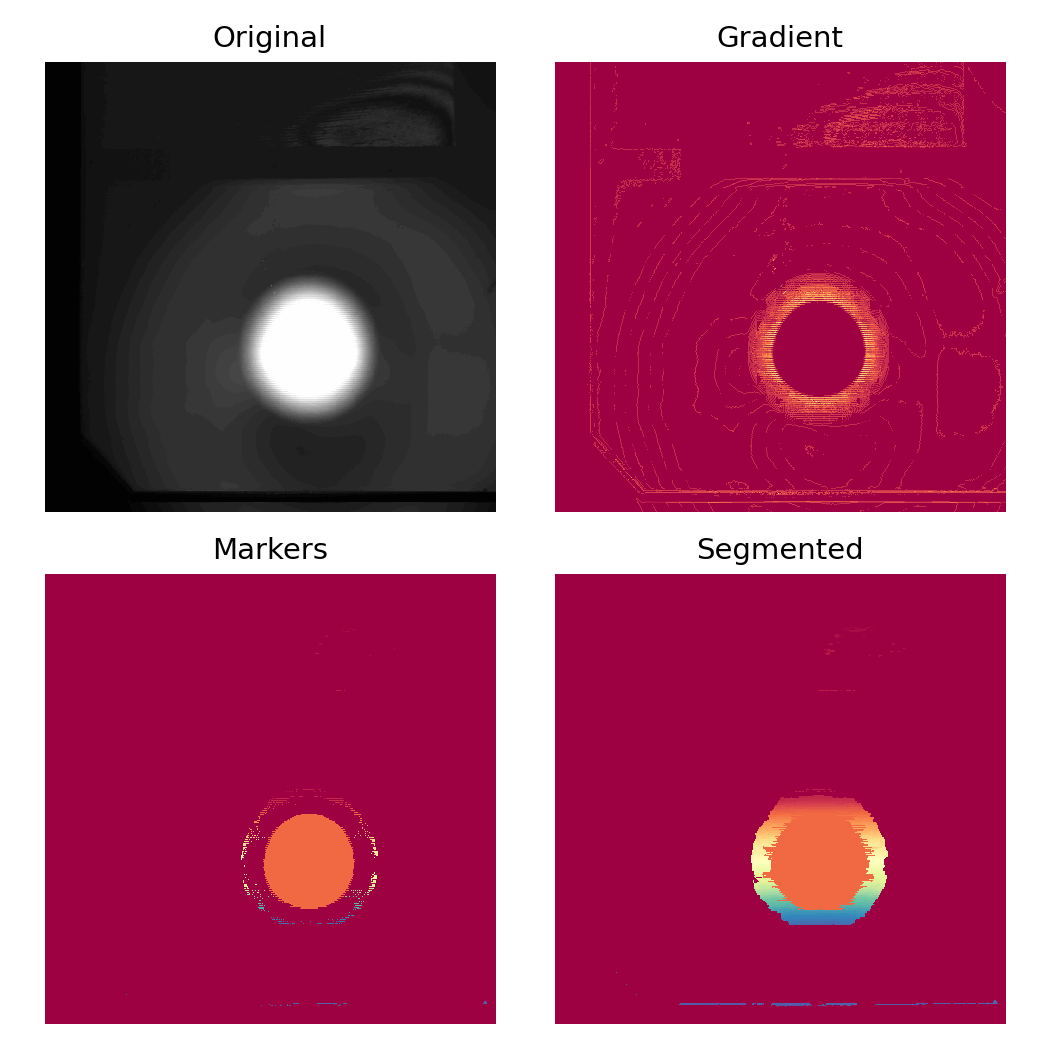

In [2]:
#基于梯度的分水岭图像分割
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,color,data,filters
import cv2


#image = color,rgb2gray(data.camara())
image = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)
denoised = filters.rank.median(image,morphology.disk(2))#过滤噪声

#将梯度值低于10的作为开始标记点
markers = filters.rank.gradient(denoised,morphology.disk(5))<10
markers = ndi.label(markers)[0]

gradient = filters.rank.gradient(denoised,morphology.disk(2)) #计算梯度
labels = morphology.watershed(gradient,markers,mask=image) # 基于梯度的分水岭算法

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6))
axes =axes.ravel()
ax0,ax1,ax2,ax3 = axes

ax0.imshow(image,cmap=plt.cm.gray,interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(gradient,cmap=plt.cm.Spectral,interpolation='nearest')
ax1.set_title("Gradient")
ax2.imshow(markers,cmap=plt.cm.Spectral,interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(labels,cmap=plt.cm.Spectral,interpolation='nearest')
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
# 使用GrabCut算法进行交互式前景提取
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt

def grabut(imgpath,rect,iterCount):
    img= cv2.imread(imgpath)
    
    # 创建一个与所加载图像同形状的Mask
    mask = np.zeros(img.shape[:2],np.uint8)
    
    # 算法内部使用的数组，必须创建两个np.float64类型的0数组，大小是（1，65）
    
    bgdModel= np.zeros((1,65),np.float64)
    fgdModel= np.zeros((1,65),np.float64)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,iterCount,cv2.GC_INIT_WITH_RECT)
    # 掩模已经变为包含0-3之间的值，值为0和2转换为0，值为1和3转为1，并将结果存在mask2中
    mask2=np.where((mask == 2)|(mask == 0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    plt.subplot(121),plt.imshow(cv2.cvtColor(cv2.imread(imgpath),cv2.COLOR_BGR2RGB))
    plt.title("original"),plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title("grabcut"),plt.xticks([]),plt.yticks([])
    
    plt.show()

if __name__ == '__main__':
    imgpath ="D:\\HSY-data\\pretreat\\NG.jpg"
    # 人工前景的矩形区域（rect.x,rect.y,rect.width,rect.height）
    rect=(0,0,10,100)
    grabut(imgpath,rect,5)
    pass

#OpenCV GrabCut算法 物体分割(python语言)

In [ ]:
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
imgpath = 'E:\\picture\\cs.jpg'
img = cv2.imread(imgpath)
 
# 预先绘制图片
fig = plt.figure()
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()
 
def OnClick(event):
    # 获取当鼠标"按下"的时候，鼠标的位置
    global Coords1x, Coords1y
    if event.button == 1:
        Coords1x = int(event.xdata)
        Coords1y = int(event.ydata)
        print("1x1y" + str(Coords1x) + str(Coords1y))
 
 
def OnMouseMotion(event):
    # 获取当鼠标"移动"的时候，鼠标的位置
    global Coords2x, Coords2y
    if event.button == 1:
        Coords2x = int(event.xdata)
        Coords2y = int(event.ydata)
        print("2x2y" + str(Coords2x) + str(Coords2y))
        
def OnMouseRelease(event):
    if event.button == 1:
        fig = plt.gca()
        img = cv2.imread(imgpath)
        # 创建一个与所加载图像同形状的Mask
        mask = np.zeros(img.shape[:2], np.uint8)
 
        # 算法内部使用的数组,你必须创建两个np.float64 类型的0数组,大小是(1, 65)
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)
 
        # 计算人工前景的矩形区域(rect.x,rect.y,rect.width,rect.height)
        rect = (Coords1x, Coords1y, Coords2x - Coords1x, Coords2y - Coords1y)
        print(rect)
        iterCount = 5
        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_RECT)
 
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        img = img * mask2[:, :, np.newaxis]
        plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.subplot(122), plt.imshow(
            cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB))
        fig.figure.canvas.draw()
 
 
# 连接鼠标点击事件
fig.canvas.mpl_connect('button_press_event', OnClick)
# 连接鼠标移动事件
fig.canvas.mpl_connect('motion_notify_event', OnMouseMotion)
fig.canvas.mpl_connect('button_release_event', OnMouseRelease)

In [ ]:
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore",module="matplotlib")

imgpath = 'E:\\picture\\cs.jpg'
img = cv2.imread(imgpath)

Coords1x,Coords1y='NA','NA'
Coords2x,Coords2y='NA','NA'

def OnClick(event):
    # 获取当鼠标"按下"的时候，鼠标的位置
    global Coords1x, Coords1y
    if event.button == 1:
        try:
            Coords1x = int(event.xdata)
            Coords1y = int(event.ydata)
        except:
            Coords1x = event.xdata
            Coords1y = event.ydata
        print("1x1y" + str(Coords1x) + str(Coords1y))


def OnMouseMotion(event):
    # 获取当鼠标"移动"的时候，鼠标的位置
    global Coords2x, Coords2y
    if event.button == 3:
        try:

            Coords2x = int(event.xdata)
            Coords2y = int(event.ydata)
        except:
            Coords2x = event.xdata
            Coords2y = event.ydata
        print("2x2y" + str(Coords2x) + str(Coords2y))


def OnMouseRelease(event):
    if event.button == 2:
        fig = plt.gca()
        img = cv2.imread(imgpath)
        # 创建一个与所加载图像同形状的Mask
        mask = np.zeros(img.shape[:2], np.uint8)
        # 算法内部使用的数组,你必须创建两个np.float64 类型的0数组,大小是(1, 65)
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)
        # 计算人工前景的矩形区域(rect.x,rect.y,rect.width,rect.height)
        if(Coords2x-Coords1x)>0 and (Coords2y-Coords1y)>0:
            try:
                rect = (Coords1x, Coords1y, Coords2x-Coords1x, Coords2y-Coords1y)
                print('#### 分割区域',rect)
                print("#### 等会儿 有点慢...")
                iterCount = 5
                cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_RECT)
                mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
                img = img * mask2[:, :, np.newaxis]
                plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.subplot(122), plt.imshow(cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB))
                fig.figure.canvas.draw()
                print('May the force be with me!')
            except:
                print('#### 先左键 后右键')
        else:
            print('#### 左下角坐标值必须大于右上角坐标')


# 预先绘制图片
fig = plt.figure()
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.colorbar()

# 鼠标左键，选取分割区域（长方形）的左上角点
fig.canvas.mpl_connect('button_press_event', OnClick)
# 鼠标右键，选取分割区域（长方形）的右下角点
fig.canvas.mpl_connect('button_press_event', OnMouseMotion)
# 鼠标中键，在所选区域执行分割操作
fig.canvas.mpl_connect('button_press_event', OnMouseRelease)
plt.show()

# 连接鼠标点击事件
#fig.canvas.mpl_connect('button_press_event', OnClick)
# 连接鼠标移动事件
#fig.canvas.mpl_connect('motion_notify_event', OnMouseMotion)
#fig.canvas.mpl_connect('button_release_event', OnMouseRelease)
#plt.show()

In [3]:
#角点检测
import cv2
import numpy as np

filename ='E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray=np.float32(gray)

#输入图像必须是float32,最后一个参数在0.04到0.05之间
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners ,not important
dst = cv2.dilate(dst,None)

#threshold for an optimal value, it may vary depengding on the image
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff ==27:
    cv2.destroyAllWindows()

In [ ]:
#亚像素级精确度的角点
import cv2
import numpy as np

filename = "D:\\HSY-data\\pretreat\\NG.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret,dst=cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
# connectedCompoentsWithStats(InputArray image ,OutputArray labels,OutpitArray status,)
#OutputArray centroids, int connectivity = 8 ,int ltype = CV_32S)
ret,labels,stats,centroids=cv2.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.001)

corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

#Now draw them
res = np.hstack((centroids,corners))
#np.int0可以用来省略小数点后面的数字（非四舍五入）
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imshow('subpixl5.png',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#使用掩模统计图像某个局部区域的直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:\\HSY-data\\pretreat\\NG.jpg",0)

# create a mask
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:300] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Caculate histogram with mask and without mask
# Check third argument for mask

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(masked_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [10]:
# 直方图均衡化
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("D:\\FTP\\Mura\\output\\cut\\04.jpg",0)

# flatten() 将数组变成一维
hist,bins=np.histogram(img.flatten(),256,[0,256])
# 计算累积分布图
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()

# 构建Numpy掩模数组，cdf为原数组，当数组元素为0时，掩盖
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
#对被掩盖的元素赋值，这里赋值为0
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

cv2.namedWindow('img2',2)
cv2.imshow('img2',img2)
if cv2.waitKey(0) & 0xff ==27:
    cv2.destroyAllWindows()
#plt.plot(cdf_normalized,color = 'b')
#plt.hist(img2.flatten(),256,[0,256],color = 'r')
#plt.xlim([0,256])
#plt.legend(('cdf','histogram'),loc = 'upper left')
#plt.show()

<IPython.core.display.Javascript object>


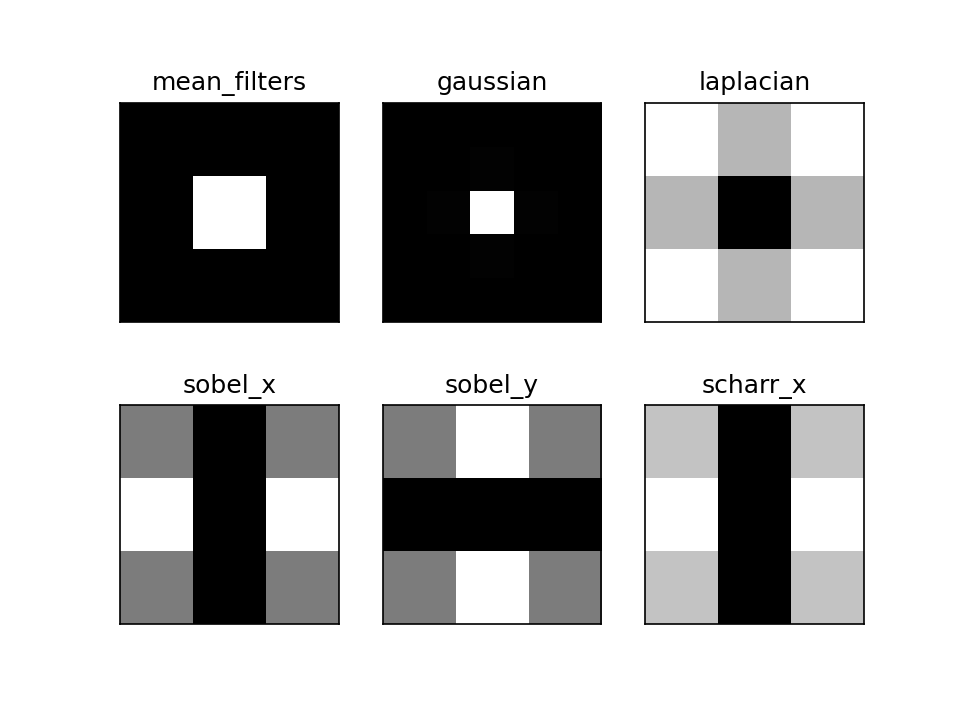

In [11]:
# 2D直方图
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('D:\\FTP\\Mura\\output\\cut\\04.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])

plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [13]:
# 傅里叶变换
import cv2
import numpy as np
from matplotlib import pyplot as plt

#simple aceraging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
#x.T 为矩阵转置
gaussian = x*x.T

# diffrent edge detecting filters
# scharr in x-direction
scharr = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
# sobel in x dicrection
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
#sobel in y dicrection
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
# laplacian
laplacian=np.array([[0,1,0],[1,-4,1],[0,1,0]])

filters = [mean_filter,gaussian,laplacian,sobel_x,sobel_y,scharr]
filter_name = ['mean_filters','gaussian','laplacian','sobel_x','sobel_y','scharr_x']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap='gray')
    plt.title(filter_name[i]),plt.xticks([]),plt.yticks([])

plt.show()
                    

C:\ProgramData\Anaconda3\envs\OpenCv\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


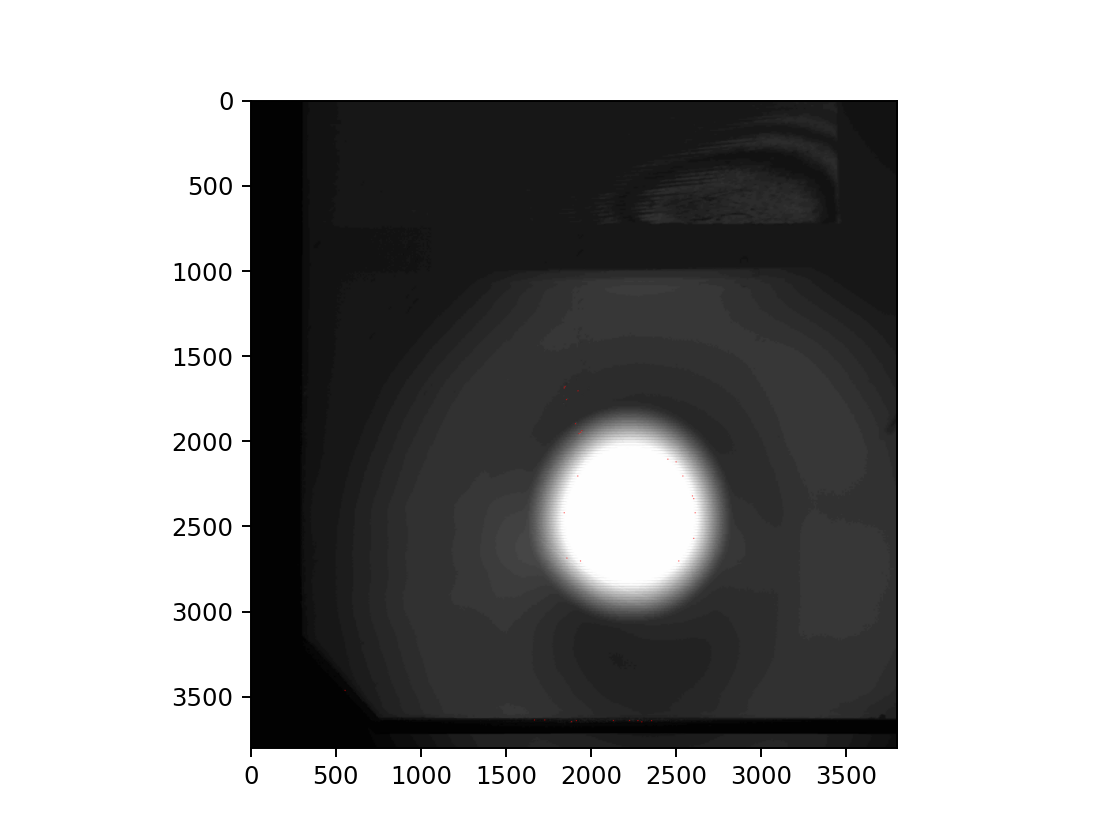

(<matplotlib.image.AxesImage at 0x2200a6e0160>, None)

In [5]:
# Shi-Tomasi 角点检测&适合于跟踪的图像特征
#试着找出25个最佳角点

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,30,0.01,10)
# 返回的结果时[[311.,250.]]两层括号的数组
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

In [6]:
# SIFT 算法
import numpy as np
import  cv2 as  cv
img = cv.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

cv.imshow(" SIFT",img)
cv.imwrite('sift_keypoints.jpg',img)
cv.waitKey(0)
cv.destroyAllWindows()


AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
import cv2
cv2.__version__

In [ ]:
#重置一张图片的大小类型，使其与另一张图片大小类型相同
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('E:/picture/')

gakki101 = cv2.imread('gakki101.jpg')
gakki102 = cv2.imread('gakki102.jpg')

rows,cols = gakki102.shape[:2] #获取sky的高度、宽度
#print(gakki102.shape[:2])
#print(bgakki101,shape[:2])
gakki101_dst = cv2.resize(gakki101,(cols,rows),interpolation=cv2.INTER_CUBIC) #放大图像
add_img = cv2.addWeighted(gakki101_dst,0.6,gakki102,0.4,0) #图像融合

cv2.imwrite('sift_keypoints.jpg',gakki101_dst)
#显示图片
titles = ['gakki101','gakki102','add_img']
imgs = [gakki101,gakki102,add_img]
for i in range(len(imgs)):
    plt.subplot(2,3,i+1)
    imgs[i] = cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB)
    plt.imshow(imgs[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [ ]:
# 基于BFmatcher的SIFT实现
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgname1 = 'D:\\HSY-data\\key Glass\\Eagle\\PtrnImage_20210329-111636-46-1.jpg'
imgname2 = 'D:\\HSY-data\\key Glass\\Eagle\\PtrnImage_20210329-121412-4-1.jpg'

sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp1, des1 = sift.detectAndCompute(img1, None)  # des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp2, des2 = sift.detectAndCompute(img2, None)  # des是描述子

hmerge = np.hstack((gray1, gray2))  # 水平拼接
cv2.imshow("gray", hmerge)  # 拼接显示为gray
cv2.waitKey(0)

img3 = cv2.drawKeypoints(img1, kp1, img1, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2, kp2, img2, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4))  # 水平拼接
cv2.imshow("point", hmerge)  # 拼接显示为gray
cv2.waitKey(0)
# BFmatchaer解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow("BFmatch",img5)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
# 使用FAST作为特征描述的关键代码和提取图像显示：
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("E:\\HSY\\crack\\4.15\\out\\68F\\T45000N\\768F22E003B3B_T45000N_457200_745000_Crack__20220404_014956.jpg",0)

fast=cv2.FastFeatureDetector_create() #获取FAST角点探测器
kp=fast.detect(img,None) #描述符
img = cv2.drawKeypoints(img,kp,img,color=(255,255,0)) # 画到Imgs上面
print("Threshold:",fast.getThreshold())#输出阈值
print("normaxSuppression:",fast.getNonmaxSuppression())#是否使用非极大值抑制
print("Total Keypoints with nonmaxSuppression",len(kp)) #特征点个数
cv2.imshow('fast',img)
cv2.waitKey(0)

Threshold: 10
normaxSuppression: True
Total Keypoints with nonmaxSuppression 156


27

In [2]:
# 基于FlannBasedMatcher的SURF实现
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgname1 = 'E:\\DP_raw_data\\469.jpg'
imgname2 = 'E:\\DP_raw_data\\muban.png'

surf = cv2.SURF_create()

FLANN_INDEX_KDTREE = 0
index_params=dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params=dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)


img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp1,des1 = surf.detectAndCompute(img1, None)  # des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp2,des2 = surf.detectAndCompute(img2, None)  # des是描述子

hmerge = np.hstack((gray1, gray2))  # 水平拼接
cv2.imshow("gray", hmerge)  # 拼接显示为gray
cv2.waitKey(0)

img3 = cv2.drawKeypoints(img1, kp1, img1, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2, kp2, img2, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈

hmerge = np.hstack((img3, img4))  # 水平拼接
cv2.imshow("point", hmerge)  # 拼接显示为gray
cv2.waitKey(0)

matches = flann.knnMatch(des1, des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow("SURF",img5)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: module 'cv2.cv2' has no attribute 'SURF_create'

In [ ]:
# 基于BFmatcher的ORB实现
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgname1 = 'E:\\picture\\gakki101.jpg'
imgname2 = 'E:\\picture\\gakki102.jpg'

orb = cv2.ORB_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp1,des1 = orb.detectAndCompute(img1, None)  # des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 灰度处理图像
kp2,des2 = orb.detectAndCompute(img2, None)  # des是描述子

hmerge = np.hstack((gray1, gray2))  # 水平拼接
cv2.imshow("gray", hmerge)  # 拼接显示为gray
cv2.waitKey(0)

img3 = cv2.drawKeypoints(img1, kp1, img1, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2, kp2, img2, color=(255, 0, 255))  # 画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4))  # 水平拼接
cv2.imshow("point", hmerge)  # 拼接显示为gray
cv2.waitKey(0)

# BFmatchaer解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow("orb",img5)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#coding=utf-8
#人脸识别类 - 使用face_recognition模块
import cv2
import face_recognition
import os

path = "img/face_recognition"  # 模型数据图片目录
cap = cv2.VideoCapture(0)
total_image_name = []
total_face_encoding = []
for fn in os.listdir(path):  #fn 表示的是文件名q
    print(path + "/" + fn)
    total_face_encoding.append(
        face_recognition.face_encodings(
            face_recognition.load_image_file(path + "/" + fn))[0])
    fn = fn[:(len(fn) - 4)]  #截取图片名（这里应该把images文件中的图片名命名为为人物名）
    total_image_name.append(fn)  #图片名字列表
while (1):
    ret, frame = cap.read()
    # 发现在视频帧所有的脸和face_enqcodings
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)
    # 在这个视频帧中循环遍历每个人脸
    for (top, right, bottom, left), face_encoding in zip(
            face_locations, face_encodings):
        # 看看面部是否与已知人脸相匹配。
        for i, v in enumerate(total_face_encoding):
            match = face_recognition.compare_faces(
                [v], face_encoding, tolerance=0.5)
            name = "Unknown"
            if match[0]:
                name = total_image_name[i]
                break
        # 画出一个框，框住脸
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        # 画出一个带名字的标签，放在框下
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255),
                      cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0,
                    (255, 255, 255), 1)
    # 显示结果图像
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('D:\\hsy\\test\\cvd1.jpg')
HSV=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
def getpos(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN: #定义一个鼠标左键按下去的事件
        print(HSV[y,x])
        
cv2.namedWindow("imageHSV",cv2.WINDOW_NORMAL)
cv2.imshow("imageHSV",HSV)
cv2.namedWindow("image",cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.setMouseCallback("imageHSV",getpos)
cv2.waitKey(0)